# EXPLORE Data Science Academy Classification Hackathon
### Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government. With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in



## Table of Contents

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Importing The Data</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Data Engineering</a>

<a href=#five>6. Modeling</a>

<a href=#six>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

<a href=#seven>9. Generating Submission File</a>

<a href=#seven>10. References</a>

## 2. Importing Packages

In [56]:
import pickle

# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Import library for train test split
from sklearn.model_selection import train_test_split
# Import Machine Learning algorithms
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Import libraries for Natural Languge Processing
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

<a id="two"></a>
## 3. Importing The Data

In [57]:
train= pd.read_csv("train_set.csv")
test= pd.read_csv("test_set.csv")
sample= pd.read_csv("sample_submission.csv")

<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)

In [58]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


Let's find unique languages and corresponding number of occurences

In [60]:
counts=train["lang_id"].value_counts()
x=counts.index
y=counts.values
counts

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

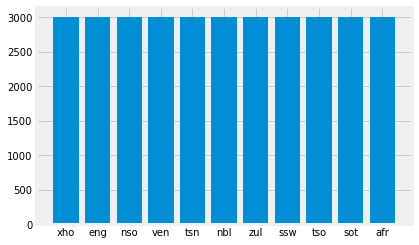

In [61]:
plt.bar(x,y)
plt.show()

Our language is balanced and contains no error values

Text overview

In [62]:
for lang in x:
    print(lang)
    print(train[train["lang_id"]==lang]["text"].values[:2])
    print('\n')

xho
['umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika'
 'i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo']


eng
['the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months'
 'if the post of accounting officer is vacant or if the accounting officer is unable to perform the functions of the post those functions must be performed by another official designated in writing by the executive authority']


nso
['o nete

The text column seem to be clean No major tranformations or cleaning required

In [63]:
puncs=list(string.punctuation)
puncs=puncs+["ã","¢","â","¬","’","‚","¦"]
def remove_punctuation(message):
    return ''.join([l for l in message if l not in puncs])


def remove_numbers(message):
    return ''.join([l for l in message if l.isnumeric()==False])

<a id="four"></a>
## 5. Data Engineering

Since our response consists of text categories, we need to convert it to numerical values.

For that issue, i will use sklearn label encoder

In [64]:
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = le.fit_transform(train['lang_id'])

In [65]:
train["code"]=y

In [66]:
train.head()

,lang_id,text,code
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,9
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,9
2,eng,the province of kwazulu-natal department of tr...,1
3,nso,o netefatša gore o ba file dilo ka moka tše le...,3
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,8


In [67]:
### concatinating test and training set

data=pd.concat([train, test])
data.drop(columns=["index"])
data["text"]=data["text"].apply(remove_punctuation)
data["text"]=data["text"].apply(remove_numbers)

##### vectorisation

In [68]:
x=data["text"]
vectorizer = CountVectorizer()
vectorizer.fit(x)
X = vectorizer.fit_transform(x)
X.shape

(38682, 152634)

##### splitting data

In [69]:
x_train=X[:33000]
x_test=X[33000:]
y_train=train["code"].values

### creating valuation data
X_train, X_validation, Y_train, Y_validation = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [70]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((23100, 152634), (9900, 152634), (23100,), (9900,))

Data now ready for modelling

<a id="five"></a>
## 6. Modelling

### Model 1: Logistic regression

In [71]:
logreg = LogisticRegression(multi_class='ovr',solver = 'liblinear')
logreg.fit(X_train, Y_train)
lr_pred=logreg.predict(X_validation)
print(classification_report(Y_validation, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00       909
           2       0.99      0.99      0.99       879
           3       1.00      1.00      1.00       941
           4       1.00      1.00      1.00       918
           5       1.00      0.99      1.00       908
           6       1.00      1.00      1.00       882
           7       1.00      1.00      1.00       857
           8       1.00      1.00      1.00       936
           9       0.99      0.99      0.99       922
          10       0.98      0.98      0.98       853

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



### Model 2: Multinomial Naive bayes

In [72]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, Y_train)
y_pred_nb = nb.predict(X_validation)
print(classification_report(Y_validation, y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00       909
           2       1.00      1.00      1.00       879
           3       1.00      1.00      1.00       941
           4       1.00      1.00      1.00       918
           5       1.00      1.00      1.00       908
           6       1.00      1.00      1.00       882
           7       1.00      1.00      1.00       857
           8       1.00      1.00      1.00       936
           9       1.00      1.00      1.00       922
          10       1.00      1.00      1.00       853

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



## Model 2: Random forest

In [87]:
logreg = LogisticRegression(max_iter=2000,multi_class='ovr',solver = 'sag')
logreg.fit(X_train, Y_train)
lr_pred=logreg.predict(X_validation)
print(classification_report(Y_validation, lr_pred))

C:\Users\makat\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\makat\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\makat\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\makat\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\makat\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       895
           1       1.00      1.00      1.00       909
           2       0.99      0.99      0.99       879
           3       1.00      1.00      1.00       941
           4       1.00      1.00      1.00       918
           5       1.00      0.99      1.00       908
           6       1.00      1.00      1.00       882
           7       1.00      1.00      1.00       857
           8       1.00      1.00      1.00       936
           9       0.99      0.99      0.99       922
          10       0.98      0.98      0.98       853

    accuracy                           0.99      9900
   macro avg       0.99      0.99      0.99      9900
weighted avg       0.99      0.99      0.99      9900



### submission

In [85]:
y_pred = nb.predict(x_test)

In [77]:
lan_code=train.groupby(["code","lang_id"]).count().index
lan_codes=dict(list(lan_code))

In [78]:
def to_lan(code):
    return lan_codes[code]

In [79]:

final=pd.DataFrame(np.arange(1,5683),columns=["index"])
final["lang_id"]=y_pred

In [80]:
final["lang_id"]=final["lang_id"].apply(to_lan)

In [81]:
final

,index,lang_id
0,1,ssw
1,2,nbl
2,3,xho
3,4,ssw
4,5,ssw
...,...,...
5677,5678,ssw
5678,5679,nso
5679,5680,sot
5680,5681,sot


In [82]:
final.to_csv("final.csv", index=False)

In [83]:
lan_codes

{0: 'afr',
 1: 'eng',
 2: 'nbl',
 3: 'nso',
 4: 'sot',
 5: 'ssw',
 6: 'tsn',
 7: 'tso',
 8: 'ven',
 9: 'xho',
 10: 'zul'}

In [84]:
data.to_csv("data.csv", index=False)